### Problem Statement : 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Our classification goal is to predict if the client will subscribe a term deposit (variable y).

### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
df = pd.read_csv('bank_new_full.csv',sep=';')

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Segregating Categorical and Numerical Columns

In [7]:
cat_cols = []
num_cols = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)    

In [8]:
for i in cat_cols:
    print(i,"-->",df[i].value_counts().count())

job --> 12
marital --> 4
education --> 8
default --> 3
housing --> 3
loan --> 3
contact --> 2
month --> 10
day_of_week --> 5
poutcome --> 3
y --> 2


### Visualisation

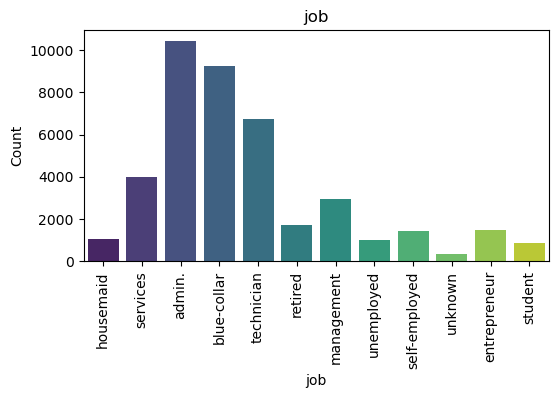

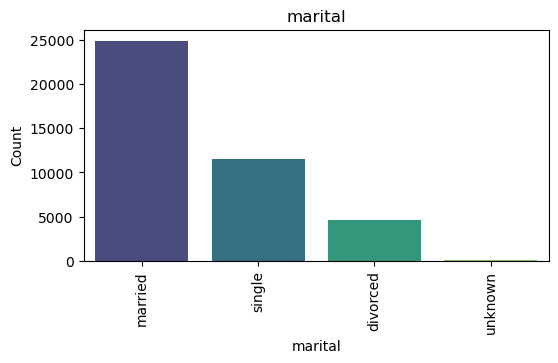

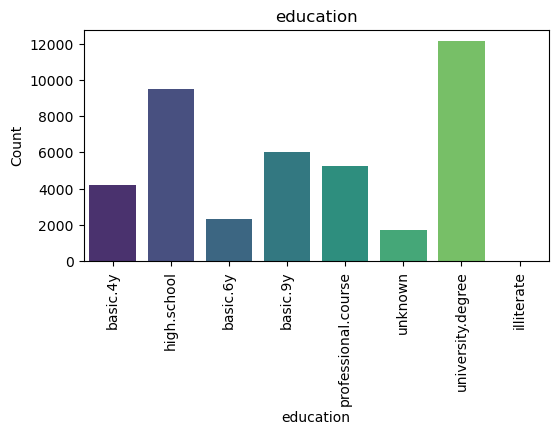

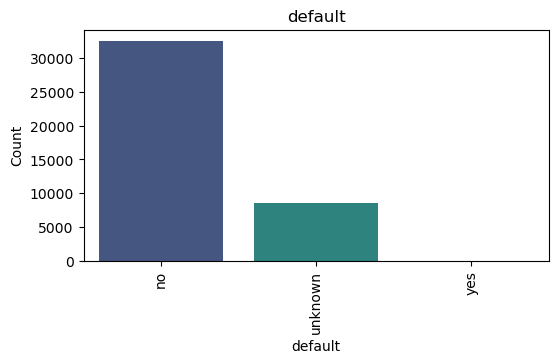

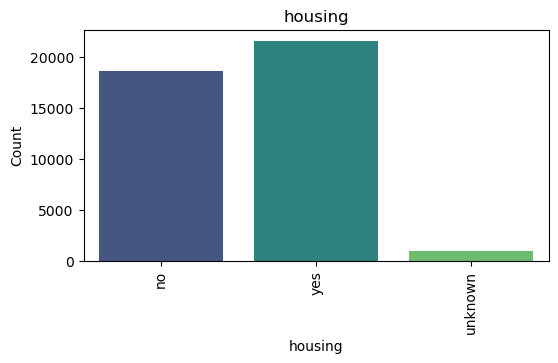

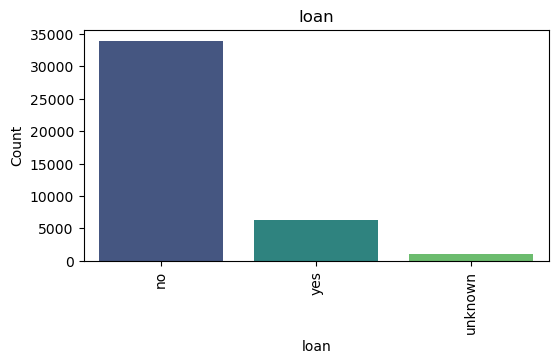

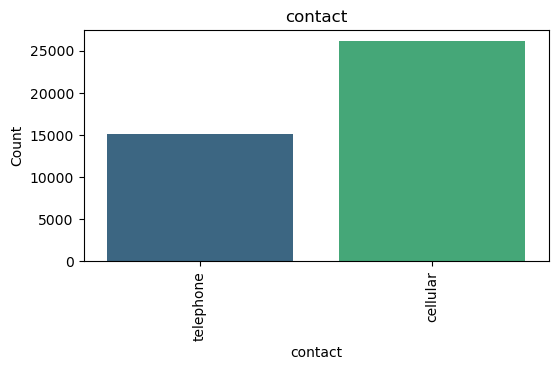

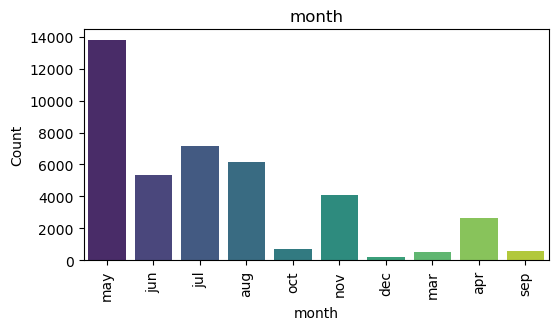

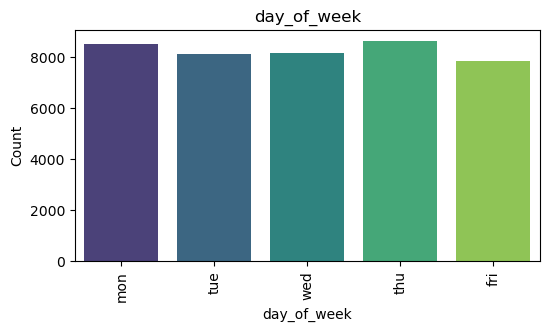

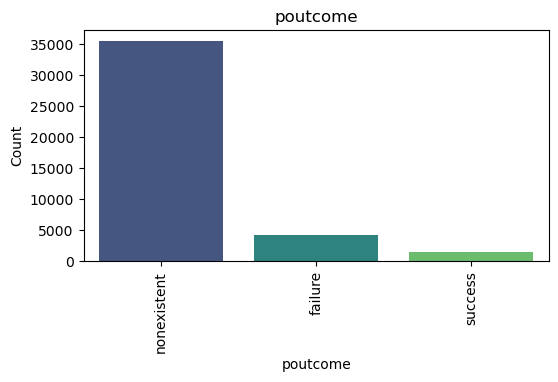

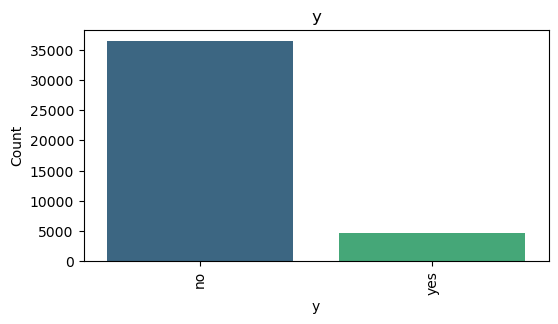

In [9]:
for i in cat_cols:
    plt.figure(figsize=(6,3))
    # sns.countplot(x=i,data=df,palette='viridis') # Commenting Just for removing warning
    sns.countplot(x=i,data=df,palette='viridis',hue = i,legend=False)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()
    

In [10]:
tar_val_cnt = df['y'].value_counts()

In [11]:
print(f"Yes Percentage: {round(tar_val_cnt['yes']/df.shape[0]*100,2)}%")
print(f"No Percentage: {round(tar_val_cnt['no']/df.shape[0]*100,2)}%")

Yes Percentage: 11.27%
No Percentage: 88.73%


## Observation :
#### By analyzing data I found target column is highly **Imbalance i.e `Yes --> 11.27%` and `No --> 88.73%`**.

### Solution : 
1. Oversampling.
2. Undersampling

### Doing Label Encoding of Categorical Data

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cat_cols:
    if i != 'y':
        df[i] = label.fit_transform(df[i])
    else :
        df[i] = df[i].map({'yes' : 1,'no' : 0})    

<Axes: >

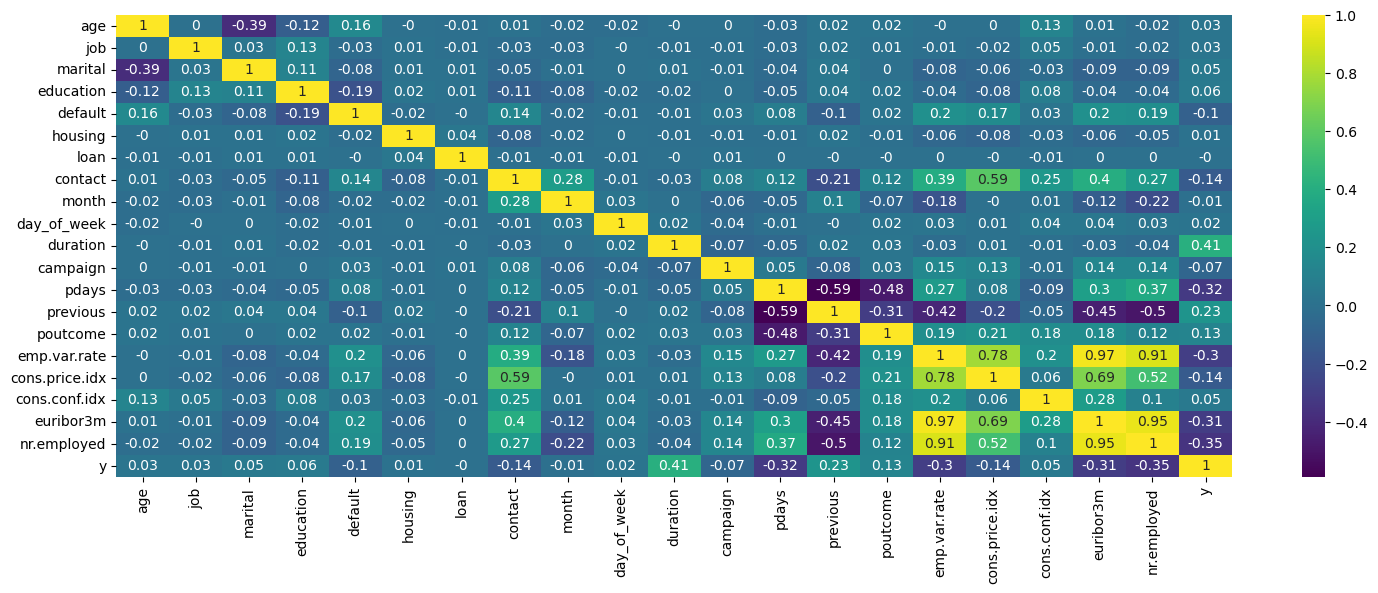

In [13]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr().round(2),annot=True,cmap='viridis')

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Observation : 
By seeing high correlation heatmap,we need to drop some of the features.
Droping following features : 
- emp.var.rate
- cons.price.idx
- euribor3m
- pdays

In [15]:
df= df.drop(['emp.var.rate','cons.price.idx','euribor3m','pdays','nr.employed'],axis=1)

<Axes: >

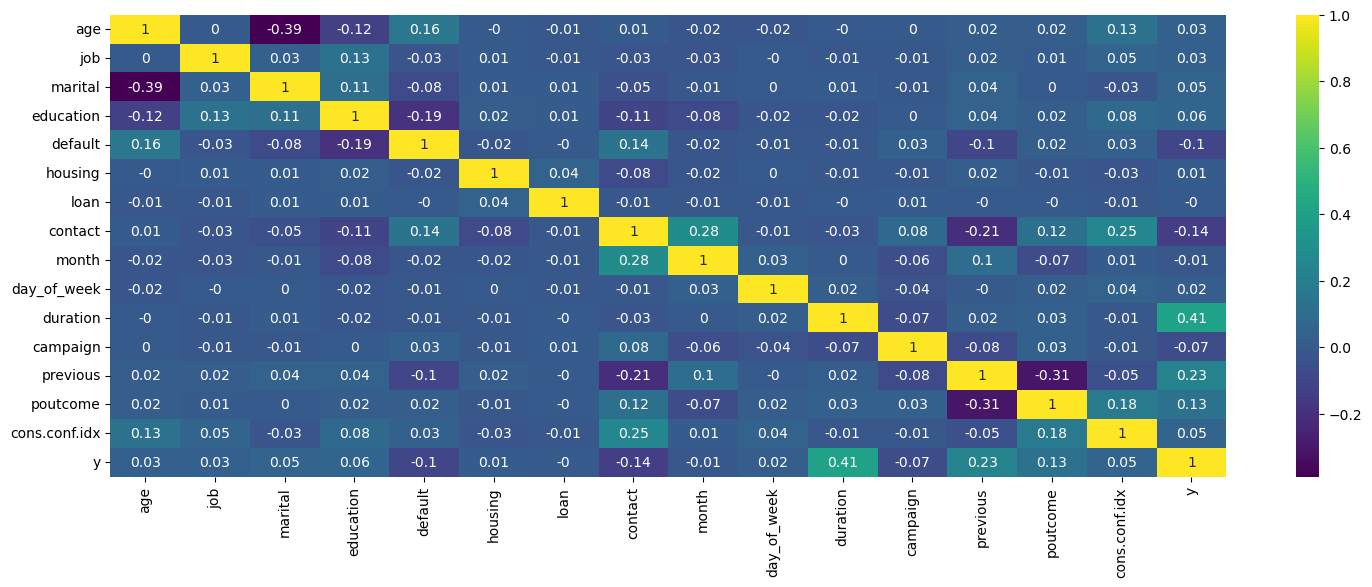

In [16]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr().round(2),annot=True,cmap='viridis')

In [17]:
for i in cat_cols:
    # if i != 'y':
    df[i] = df[i].astype('category')

In [18]:
df.dtypes

age                 int64
job              category
marital          category
education        category
default          category
housing          category
loan             category
contact          category
month            category
day_of_week      category
duration            int64
campaign            int64
previous            int64
poutcome         category
cons.conf.idx     float64
y                category
dtype: object

In [19]:
inputs = df.drop('y',axis=1)
target = df['y']

### Segregating _20%_ of data for testing.

In [20]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=42)

### Applying Standard_Scalar to Numerical Column and One-Hot Encoding to Categorical Data

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer,make_column_selector
num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OneHotEncoder())
preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include='category'))
)

In [22]:
x_train_pre = preprocessing.fit_transform(x_train)
x_test_pre = preprocessing.transform(x_test)

In [23]:
import pickle
with open('preprocessing.pkl', 'wb') as f:
    pickle.dump(preprocessing, f)

### For Balancing data performing oversampling with `SMOTE`

### What to do first Oversampling/Undersampling or Scaling?
Refer Article : [Stack_Overflow](https://stackoverflow.com/questions/48369464/imbalanced-classification-order-of-oversampling-vs-scaling-features)

I have done Scaling first because, it prevents data from going out of range during after oversampling.

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_os,y_train_os = sm.fit_resample(x_train_pre,y_train)

In [25]:
x_train_os.shape

(58490, 58)

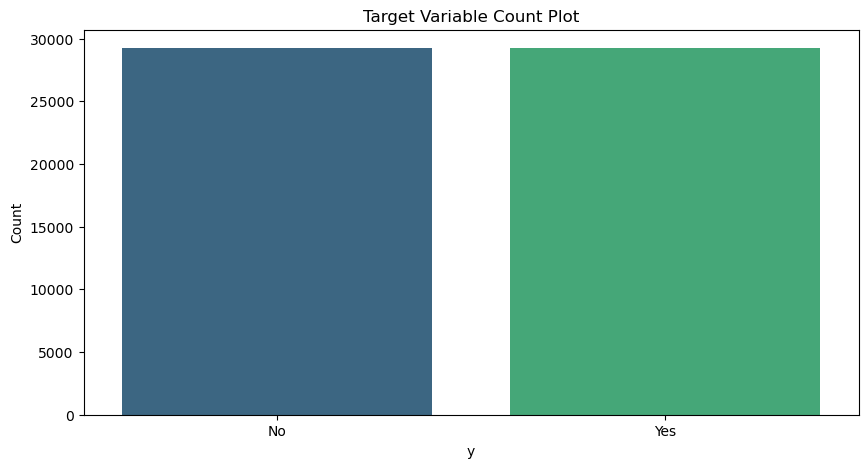

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train_os,data=df,palette='viridis',hue = y_train_os,legend=False)
plt.xticks([1,0], ['Yes', 'No'])
plt.xlabel('y')
plt.ylabel('Count')
plt.title("Target Variable Count Plot")
plt.show()

## Modelling

In [27]:
table = pd.DataFrame(columns=['Model', 'Precision', 'Recall','F1 Score','Accuracy'])

#### Function to display confusion matrix and display various measures

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
def evaluate(y_pred,model_name,table,y_test=y_test):
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)
    recall= recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    new_row = pd.DataFrame({'Model': [model_name],
                            'Precision': [precision],
                            'Recall': [recall],
                            'F1 Score': [f1],
                            'Accuracy': [accuracy]})
    new_row = new_row.dropna(axis=1, how='all') # For removing warning
    table = pd.concat([table, new_row], ignore_index=True)
    table = table.round(2)
    print(table)
    plt.figure(figsize=(9,9))
    ConfusionMatrixDisplay.from_predictions(label.inverse_transform(y_test),label.inverse_transform(y_pred),cmap='viridis')
    plt.show()
    return table
    


1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_os,y_train_os)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.83      0.57     85.64


/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_32514/450882437.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table = pd.concat([table, new_row], ignore_index=True)


<Figure size 900x900 with 0 Axes>

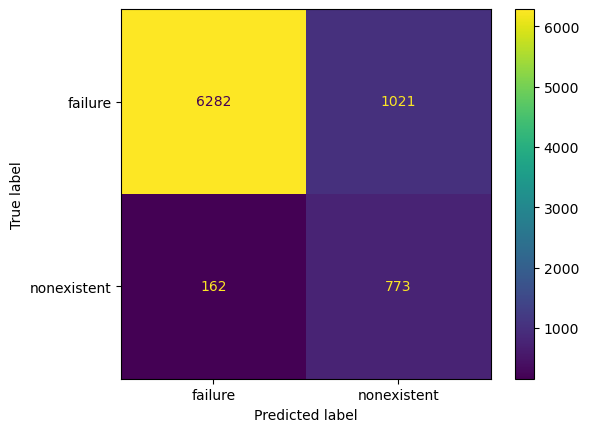

In [31]:
table = evaluate(y_pred,'Logistic Regression',table)

2. KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_os,y_train_os)

KNeighborsClassifier()

In [33]:
y_pred_knn = knn.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.83      0.57     85.64
1   KNearest Neighbour       0.41    0.78      0.54     84.79


<Figure size 900x900 with 0 Axes>

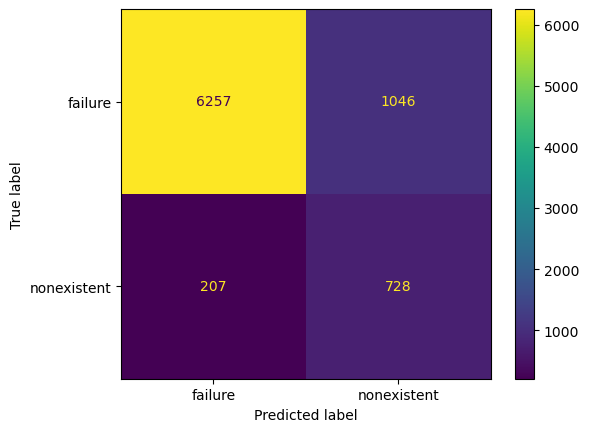

In [34]:
table = evaluate(y_pred_knn,'KNearest Neighbour',table)

3. SGD

In [35]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train_os,y_train_os)
y_pred_sgd=sgd.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.83      0.57     85.64
1   KNearest Neighbour       0.41    0.78      0.54     84.79
2                  SGD       0.43    0.84      0.57     85.41


<Figure size 900x900 with 0 Axes>

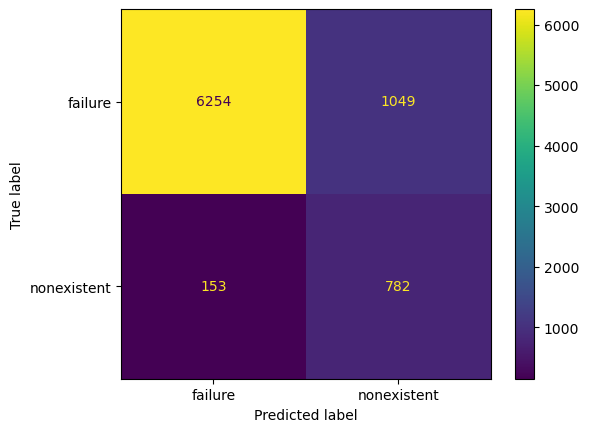

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.43,0.83,0.57,85.64
1,KNearest Neighbour,0.41,0.78,0.54,84.79
2,SGD,0.43,0.84,0.57,85.41


In [36]:
evaluate(y_pred_sgd,'SGD',table)

4. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_os,y_train_os)
y_pred_dt=dt.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.83      0.57     85.64
1   KNearest Neighbour       0.41    0.78      0.54     84.79
2        Decision Tree       0.46    0.54      0.50     87.70


<Figure size 900x900 with 0 Axes>

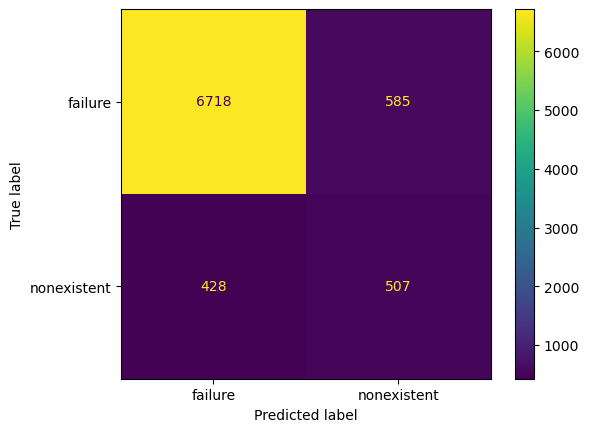

In [38]:
table = evaluate(y_pred_dt,'Decision Tree',table)

5. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_os,y_train_os)
y_pred_rf = rf.predict(x_test_pre)

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.83      0.57     85.64
1   KNearest Neighbour       0.41    0.78      0.54     84.79
2        Decision Tree       0.46    0.54      0.50     87.70
3        Random Forest       0.58    0.55      0.57     90.41


<Figure size 900x900 with 0 Axes>

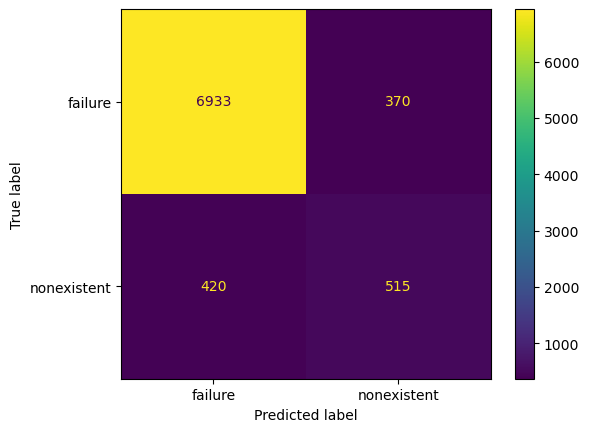

In [40]:
table = evaluate(y_pred_rf,"Random Forest",table)

#### Since Random Forest is having best accuracy so fine tuning it.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200],            
    'max_depth': [10, 30],                  
    'min_samples_split': [10, 50],          
    'min_samples_leaf': [5, 20],           
    'max_features': ['sqrt', 'log2'],          
    'bootstrap': [True,False],                        
    'criterion': ['gini', 'entropy'],          
    'class_weight': [None, 'balanced']         
}
rf2=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=10,cv=3,scoring='accuracy',random_state=42,n_jobs=-1)
rf2.fit(x_train_os,y_train_os)
y_pred_rf2=rf2.predict(x_test_pre)

In [42]:
rf2.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy',
 'class_weight': None,
 'bootstrap': False}

                 Model  Precision  Recall  F1 Score  Accuracy
0  Logistic Regression       0.43    0.83      0.57     85.64
1   KNearest Neighbour       0.41    0.78      0.54     84.79
2        Decision Tree       0.46    0.54      0.50     87.70
3        Random Forest       0.58    0.55      0.57     90.41
4  Random Forest(RSCV)       0.57    0.61      0.59     90.26


<Figure size 900x900 with 0 Axes>

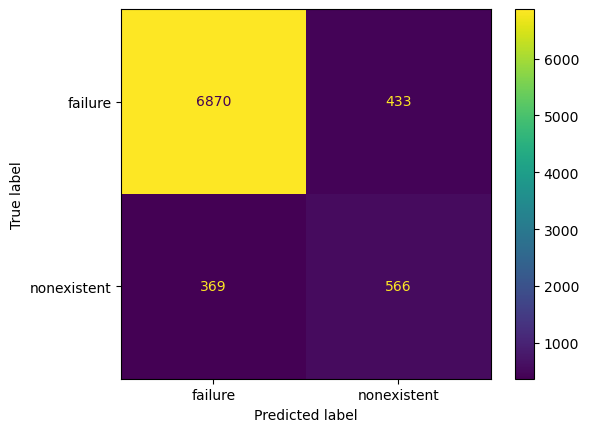

In [43]:
table = evaluate(y_pred_rf2,"Random Forest(RSCV)",table)

In [44]:
x_train_os.shape

(58490, 58)

In [45]:
table

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.43,0.83,0.57,85.64
1,KNearest Neighbour,0.41,0.78,0.54,84.79
2,Decision Tree,0.46,0.54,0.50,87.70
3,Random Forest,0.58,0.55,0.57,90.41
4,Random Forest(RSCV),0.57,0.61,0.59,90.26


### Observation
1. Even After Fine Tuning `Random Forest(RSCV)` have slightly less Accuracy and Precision than 
`Random Forest`.
2. Using `Random Forest` as final model for prediction **because of highest Precision and Accuracy**.

Here, according to me, `Precision is more crucial than Accuracy` because the bank is interested in knowing out of all 'Yes' predictions, how many were actually 'Yes'. Hence, we want to reduce False Positives, and for this, we are focusing on Precision.

In [46]:
import gzip
with gzip.open('rf.pkl.gz', 'rb') as f:
    pickle_model = pickle.load(f)
pickle_pre = pickle.load(open('preprocessing.pkl','rb'))

In [47]:
sample_input = pd.DataFrame([[45, 2, 1, 0, 0, 0, 0, 1, 6, 1, 261, 1, 0, 2, -57.4]], 
                            columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous', 
                        'poutcome', 'cons.conf.idx'])


In [48]:
scaled_input = pickle_pre.transform(sample_input)
predict = pickle_model.predict(scaled_input)

In [49]:
predict

array([0])